# Quick start
```{warning}
It is currently under devellopement. Please contact me before using it.
```

## Load DICe output
[DICe](http://dicengine.github.io/dice/) is an open source software to performe Digital Image Correlation.

In [1]:
adr_DICe='/data/Manips/Columnar_Ice/CI02/DIC_Analysis/1n_analysis/n16/'

In [2]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
import xarray_dic.loadDIC as ldDIC
import xarray_symTensor2d.xarray_symTensor2d as xT
import xarray_dic.xarray_dic as xd

In [4]:
ds=ldDIC.loadDICe(adr_DICe,0.01,10)

In [5]:
ds

<xarray.Dataset>
Dimensions:       (d: 2, sT: 6, time: 45, x: 96, xt: 95, y: 102, yt: 101)
Coordinates:
  * x             (x) float64 0.0 0.16 0.32 0.48 0.64 ... 14.72 14.88 15.04 15.2
  * y             (y) float64 0.0 0.16 0.32 0.48 0.64 ... 15.68 15.84 16.0 16.16
  * xt            (xt) float64 0.16 0.32 0.48 0.64 ... 14.72 14.88 15.04 15.2
  * yt            (yt) float64 0.16 0.32 0.48 0.64 ... 15.68 15.84 16.0 16.16
  * time          (time) float64 10.0 20.0 30.0 40.0 ... 420.0 430.0 440.0 450.0
Dimensions without coordinates: d, sT
Data variables:
    displacement  (time, y, x, d) float64 -0.01672 0.02898 ... 0.207 0.2193
    strain        (time, yt, xt, sT) float64 -0.0009465 0.001626 nan ... nan nan
Attributes:
    unit_time:      min
    step_size:      0.01
    unit_position:  millimeter
    window_size:    16
    path_dat:       /data/Manips/Columnar_Ice/CI02/DIC_Analysis/1n_analysis/n16/
    DIC_software:   DICe

## Load 7D output
7D is a software to performe Digital Image Correlation written by [Pierre Vacher](https://www.univ-smb.fr/symme/members/pierre-vacher/).

In [6]:
adr_7d='/data/Manips/Columnar_Ice/CI23/DIC_Analysis/nm_analysis_0.5pc/n40/'
ds=ldDIC.load7D(adr_7d,0.01,0.005,unit_time='macro_strain')

In [7]:
ds

<xarray.Dataset>
Dimensions:       (d: 2, sT: 6, time: 11, x: 108, y: 108)
Coordinates:
  * x             (x) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
  * y             (y) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
  * time          (time) float64 0.005 0.01 0.015 0.02 ... 0.04 0.045 0.05 0.055
Dimensions without coordinates: d, sT
Data variables:
    displacement  (time, y, x, d) float64 nan nan -0.05532 ... 0.1069 0.05642
    strain        (time, y, x, sT) float64 nan nan nan nan ... 0.00692 nan nan
Attributes:
    unit_time:      macro_strain
    step_size:      0.01
    unit_position:  millimeter
    window_size:    40
    path_dat:       /data/Manips/Columnar_Ice/CI23/DIC_Analysis/nm_analysis_0...
    DIC_software:   7D

## Visualize the data
To plot the strain field and displacement field for a given time step ts

In [8]:
ts=0

(-0.2, 43.0, -0.2, 43.0)

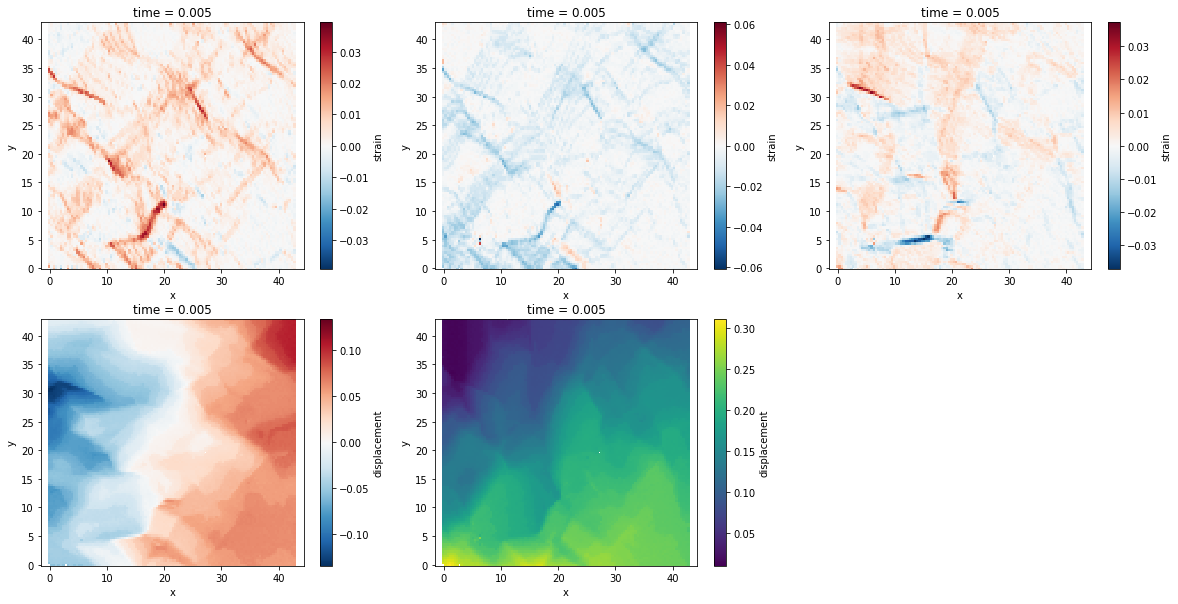

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(231)
ds.strain[ts,:,:,0].plot()
plt.axis('equal')
plt.subplot(232)
ds.strain[ts,:,:,1].plot()
plt.axis('equal')
plt.subplot(233)
ds.strain[ts,:,:,3].plot()
plt.axis('equal')
plt.subplot(234)
ds.displacement[ts,:,:,0].plot()
plt.axis('equal')
plt.subplot(235)
ds.displacement[ts,:,:,1].plot()
plt.axis('equal')

## Compute the deformation equivalent

The deformation equivelent of $\varepsilon$ is given by :

$\varepsilon_{eq}=\sqrt{\frac{2}{3}\varepsilon_{ij}^d\varepsilon_{ij}^d}$

with : $\varepsilon^d=\varepsilon-\frac{1}{3}tr(\varepsilon)I$

Definition from [wikipedia](https://en.wikipedia.org/wiki/Infinitesimal_strain_theory)

In [10]:
ds['eqVonMises']=ds.strain.sT.eqVonMises()
ds['eqVM_ln']=ds.strain.sT.eqVonMises(lognorm=True)

/home/chauvet/Documents/GitToolboxs/DIC/xarray_symTensor2d/xarray_symTensor2d/xarray_symTensor2d.py:29: RuntimeWarning: Mean of empty slice
  tr=np.nanmean(np.array(self._obj[...,0:3]),axis=-1)
/home/chauvet/Documents/GitToolboxs/DIC/xarray_symTensor2d/xarray_symTensor2d/xarray_symTensor2d.py:42: RuntimeWarning: divide by zero encountered in log
  deq[i,...]=np.log(deq[i,...]/med[i])


In [11]:
ds

<xarray.Dataset>
Dimensions:       (d: 2, sT: 6, time: 11, x: 108, y: 108)
Coordinates:
  * time          (time) float64 0.005 0.01 0.015 0.02 ... 0.04 0.045 0.05 0.055
  * x             (x) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
  * y             (y) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
Dimensions without coordinates: d, sT
Data variables:
    displacement  (time, y, x, d) float64 nan nan -0.05532 ... 0.1069 0.05642
    strain        (time, y, x, sT) float64 nan nan nan nan ... 0.00692 nan nan
    eqVonMises    (time, y, x) float64 0.0 0.0002017 ... 0.0001406 0.0002049
    eqVM_ln       (time, y, x) float64 -inf 2.384 3.113 ... -1.369 1.759 2.136
Attributes:
    unit_time:      macro_strain
    step_size:      0.01
    unit_position:  millimeter
    window_size:    40
    path_dat:       /data/Manips/Columnar_Ice/CI23/DIC_Analysis/nm_analysis_0...
    DIC_software:   7D

(-0.2, 43.0, -0.2, 43.0)

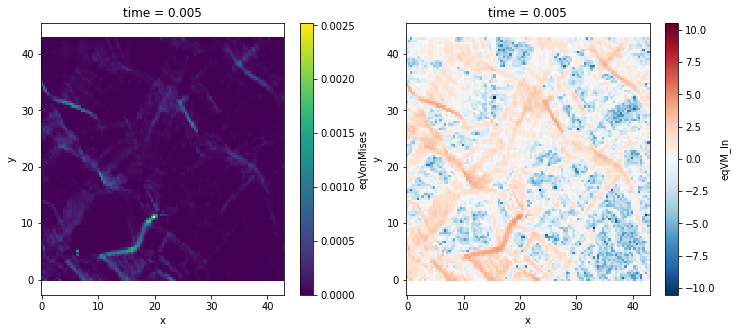

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
ds.eqVonMises[ts].plot()
plt.axis('equal')
plt.subplot(122)
ds.eqVM_ln[ts].plot()
plt.axis('equal')

## Compute the macroscopic strain
### Compute the average of the strain tensor

In [13]:
ds['mean_eyy']=ds.strain.sT.mean('tyy')
ds['mean_exx']=ds.strain.sT.mean('txx')

### Compute the ```DIC_line```

The ```DIC_line``` is defined in [1, section 2.2.3.1](https://tel.archives-ouvertes.fr/tel-01624418)

In [14]:
ds['dl_x']=ds.dic.DIC_line('x')
ds['dl_y']=ds.dic.DIC_line('y')

In [15]:
ds.displacement.coords.items

<bound method Mapping.items of Coordinates:
  * time     (time) float64 0.005 0.01 0.015 0.02 ... 0.04 0.045 0.05 0.055
  * x        (x) float64 0.0 0.4 0.8 1.2 1.6 2.0 ... 41.2 41.6 42.0 42.4 42.8
  * y        (y) float64 0.0 0.4 0.8 1.2 1.6 2.0 ... 41.2 41.6 42.0 42.4 42.8>

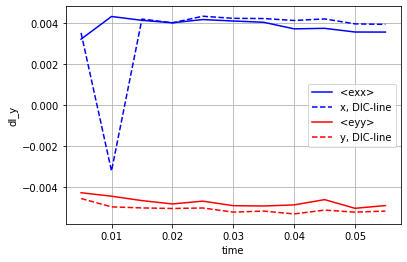

In [16]:
plt.figure()
ds.mean_exx.plot.line('b-',label='<exx>')
ds.dl_x.plot.line('b--',label='x, DIC-line')
ds.mean_eyy.plot.line('r-',label='<eyy>')
ds.dl_y.plot.line('r--',label='y, DIC-line')
plt.grid()
plt.legend()

In [17]:
ds

<xarray.Dataset>
Dimensions:       (d: 2, sT: 6, time: 11, x: 108, y: 108)
Coordinates:
  * time          (time) float64 0.005 0.01 0.015 0.02 ... 0.04 0.045 0.05 0.055
  * x             (x) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
  * y             (y) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
Dimensions without coordinates: d, sT
Data variables:
    displacement  (time, y, x, d) float64 nan nan -0.05532 ... 0.1069 0.05642
    strain        (time, y, x, sT) float64 nan nan nan nan ... 0.00692 nan nan
    eqVonMises    (time, y, x) float64 0.0 0.0002017 ... 0.0001406 0.0002049
    eqVM_ln       (time, y, x) float64 -inf 2.384 3.113 ... -1.369 1.759 2.136
    mean_eyy      (time) float64 -0.004295 -0.004464 ... -0.005055 -0.004922
    mean_exx      (time) float64 0.003198 0.004306 ... 0.003548 0.003545
    dl_x          (time) float64 0.003503 -0.003233 ... 0.003946 0.00392
    dl_y          (time) float64 -0.004578 -0.004985 ... -0.005241 -0.005191
Attributes:
    unit_time:      macro_strain
    step_size:      0.01
    unit_position:  millimeter
    window_size:    40
    path_dat:       /data/Manips/Columnar_Ice/CI23/DIC_Analysis/nm_analysis_0...
    DIC_software:   7D